In [1]:
import sys
import os
# Add the directory containing 'thesis_utils.py' to the system path
sys.path.append(os.path.abspath('..'))  # If 'thesis_utils.py' is one level up
# Or use this if it's in the same directory as the notebook:
# sys.path.append(os.getcwd())
# os.environ["JULIA_NUM_THREADS"] = "8" 
os.environ["PYTHON_JULIACALL_HANDLE_SIGNALS"] = "yes"
os.environ["PYTHON_JULIACALL_THREADS"] = "auto"
os.environ["PYTHON_JULIACALL_OPTLEVEL"] = "3"
from pysr import PySRRegressor
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sdmetrics.single_column import KSComplement

from thesis_utils import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [ ]:
import importlib
import thesis_utils  # or whatever your module is called

importlib.reload(thesis_utils)

from thesis_utils import *

In [2]:
data = pd.read_csv("../../data/real_estate/real_estate_valuation_cleaned.csv")

In [3]:
# Generate the profiling report
profile_full = ProfileReport(data, title="Real Estate", explorative=True)

# Display the report in the notebook
profile_full.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 46603.38it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# variable assignment according to correlation structure
independents_lst = ['X2 distance MRT station', 'X3 number convenience stores', 'X4 lat']
dependent_var = 'X6 price'
X = data[independents_lst].to_numpy()
y = data[dependent_var].to_numpy()

28.9**2 * RBF(length_scale=30) + WhiteKernel(noise_level=40)


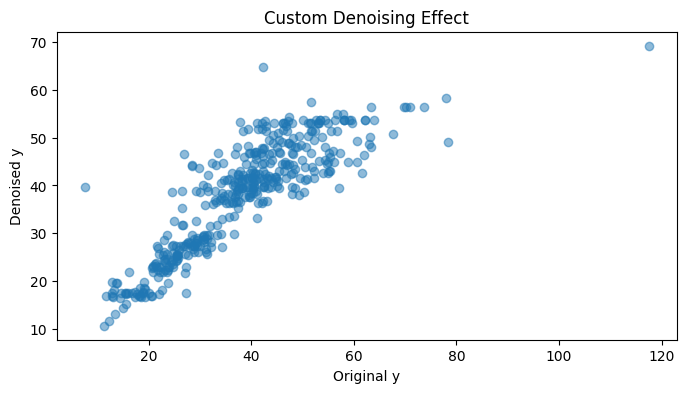

In [5]:
%matplotlib inline
y_denoised = bound_denoise(X, y, length_scale_bounds=(1e-3, 30), noise_level_bounds=(1e-5, 40), show_denoising_effect=True)

In [6]:
data_denoised = data.copy()
data_denoised['X6 price'] = y_denoised
data_denoised.to_csv('data/real_estate_valuation_cleaned_denoised.csv', index=False)

In [7]:
sr_model = PySRRegressor(
        niterations=1024,  # Number of iterations to search for equations
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["log", "abs", "sqrt"],
        maxdepth=10,
        elementwise_loss="loss(x, y) = (x - y)^2",  # Define loss function (mean squared error)
        verbosity=0,
        maxsize=50
    )
sr_model.fit(X, y_denoised)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          37.819244   
	1         0.165705                                      x1 + 33.72317   
	2         0.265766                                66.35602 - sqrt(x0)   
	3         0.446723                    (x0 * -0.0073355264) + 45.76887   
	4   >>>>  0.552406                    1307.2202 / sqrt(x0 + 534.5473)   
	5         0.002511            (x1 + 1306.2515) / sqrt(x0 + 540.20917)   
	6         0.034954      (1255.0004 / sqrt(x0 + 550.03864)) + sqrt(x1)   
	7         0.004856  ((sqrt(x1) * 67.73525) + 1275.9197) / sqrt(x0 ...   
	8         0.003615  50.10822 - abs(abs(5.4191704 - abs((log(x0) * ...   
	9         0.067134  ((517.7109 / x0) + 47.06022) - abs(5.498983 - ...   
	10        0.011475  (47.530945 - (x1 * (-69.44457 / x0))) - abs(5....   
	11        0.009701  ((sqrt(x1 / x0) * x2) - -45.605488) - abs(5.13...   
	12        0.004165  ((sqrt((x1 / x0) * 1.6224123) * x2) - -44.4186...   
	13        0.004351  (43.615467 - ((x1 - x2) * sqrt(x1 / (x0 * 0.25...   
	14        0.000091  (43.69815 - (sqrt(x1 / (x0 * 0.25496417)) * (x...   
	15        0.000033  (43.635647 - ((x1 - x2) * sqrt(x1 / (x0 * 0.25...   
	16        0.002771  (43.22546 - ((x1 - x2) * sqrt(x1 / (x0 * 0.218...   
	17        0.002679  ((46.99639 - ((x1 * -16.869217) / sqrt(x0))) -...   
	18        0.016364  ((47.788624 - (x1 * (-15.610215 / sqrt(x0)))) ...   
	19        0.005105  ((47.734528 - ((x1 * -15.670526) / sqrt(x0))) ...   
	20        0.001616  ((47.941753 - (-15.50469 * (x1 / sqrt(x0)))) -...   
	21        0.003169  ((47.524933 - (x1 * (-15.530307 / sqrt(x0)))) ...   
	22        0.002222  ((47.84287 - ((x1 * -15.806474) / sqrt(x0))) -...   
	23        0.006418  ((47.595726 - ((x1 * -15.700808) / sqrt(x0))) ...   
	24        0.000729  ((47.595726 - ((-15.700808 / sqrt(x0)) * x1)) ...   
	25        0.000376  ((47.62816 - ((-15.734305 / sqrt(x0)) * x1)) -...   
	26        0.000027  ((47.6279 - ((-15.734333 / sqrt(x0)) * x1)) - ...   
	27        0.000447  ((47.93553 - ((x1 * -16.687181) / sqrt(x0))) -...   
	28        0.002031  ((47.93553 - ((x1 * -16.687181) / sqrt(x0))) -...   
	29        0.000094  ((47.93429 - (x1 * (-16.687767 / sqrt(x0)))) -...   
	30        0.000783  ((47.935207 - ((x1 * -16.687738) / sqrt(x0))) ...   
	31        0.000316  ((47.747963 - ((x1 * -17.300253) / sqrt(x0))) ...   
	
	          loss  complexity  
	0   131.971850           1  
	1    94.744095           3  
	2    72.632600           4  
	3    46.464610           5  
	4    26.743326           6  
	5    26.609379           8  
	6    25.695340           9  
	7    25.446985          11  
	8    25.081646          15  
	9    23.453085          16  
	10   22.920969          18  
	11   22.699686          19  
	12   22.511387          21  
	13   22.316364          23  
	14   22.314337          24  
	15   22.313599          25  
	16   22.251854          26  
	17   22.132950          28  
	18   21.773716          29  
	19   21.552525          31  
	20   21.482990          33  
	21   21.415018          34  
	22   21.367489          35  
	23   21.230800          36  
	24   21.199867          38  
	25   21.183945          40  
	26   21.182255          43  
	27   21.172785          44  
	28   21.129824          45  
	29   21.125868          47  
	30   21.109327          48  
	31   21.096003          50  
]

In [4]:
# 20250502_121412_W2FmOd
# Complexity 19
candidate_function = generate_candidate_function("((sqrt(x1 / x0) * x2) - -45.605488) - abs(5.1321917 - abs((log(x0) * 9.815677) + -49.165707))")

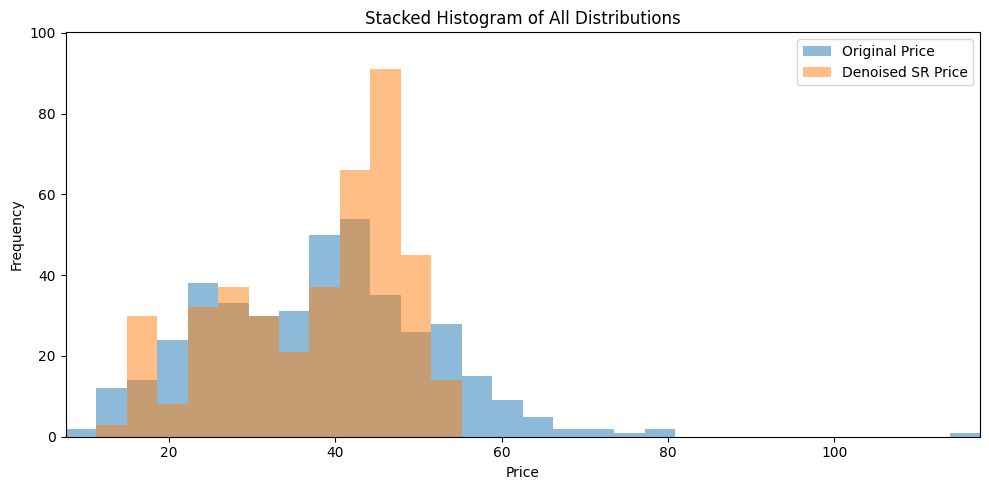

In [5]:
y_denoised_sr = candidate_function(X)
plot_histograms([(y, 'Original Price', None), (y_denoised_sr, 'Denoised SR Price', None)], 'Price', stack=True, figsize_per_plot=(10, 5))

In [12]:
kscomplement_score = KSComplement.compute(
    real_data=y,
    synthetic_data=y_denoised_sr
)
print(f'KSComplement Score = {round(kscomplement_score * 100, 2)}%')

KSComplement Score = 85.99%


<Figure size 640x480 with 0 Axes>

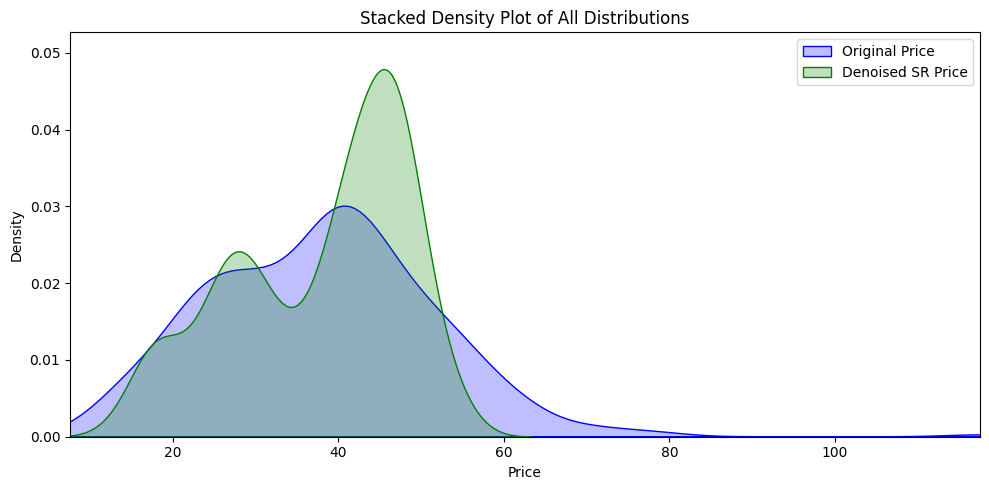

In [6]:
plot_densities([(y, 'Original Price', 'blue'), (y_denoised_sr, 'Denoised SR Price', 'green')], 'Price', stack=True, figsize_per_plot=(10, 5))

In [7]:
orig_residuals = y - y_denoised_sr

In [8]:
y_corrected, best_amp, errors, _ = correct_predictions(y, y_denoised_sr, method='stratified', seed=42, clip_lower=0, clip_upper=None, original_residuals=None, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run

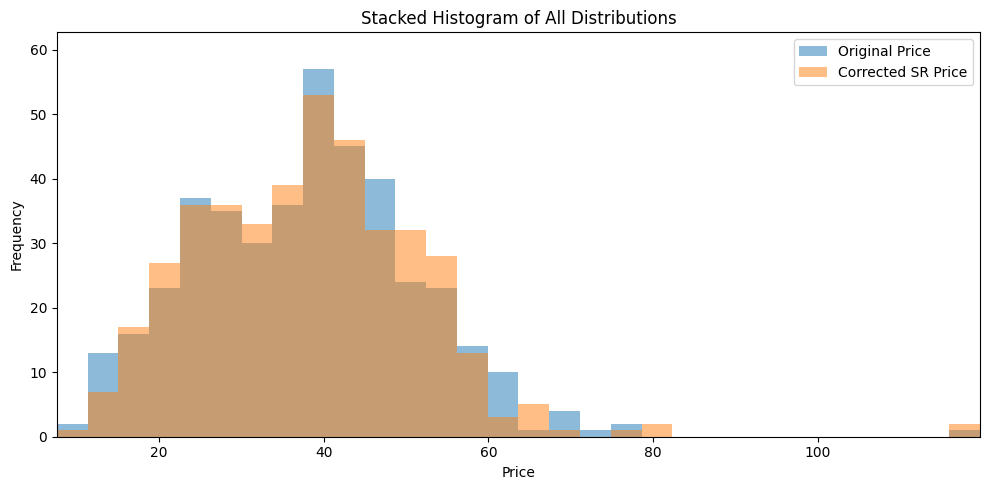

In [9]:
plot_histograms([(y, 'Original Price', None), (y_corrected, 'Corrected SR Price', None)], 'Price', stack=True, figsize_per_plot=(10, 5))

In [13]:
kscomplement_score = KSComplement.compute(
    real_data=y,
    synthetic_data=y_corrected
)
print(f'KSComplement Score = {round(kscomplement_score * 100, 2)}%')

KSComplement Score = 97.1%


<Figure size 640x480 with 0 Axes>

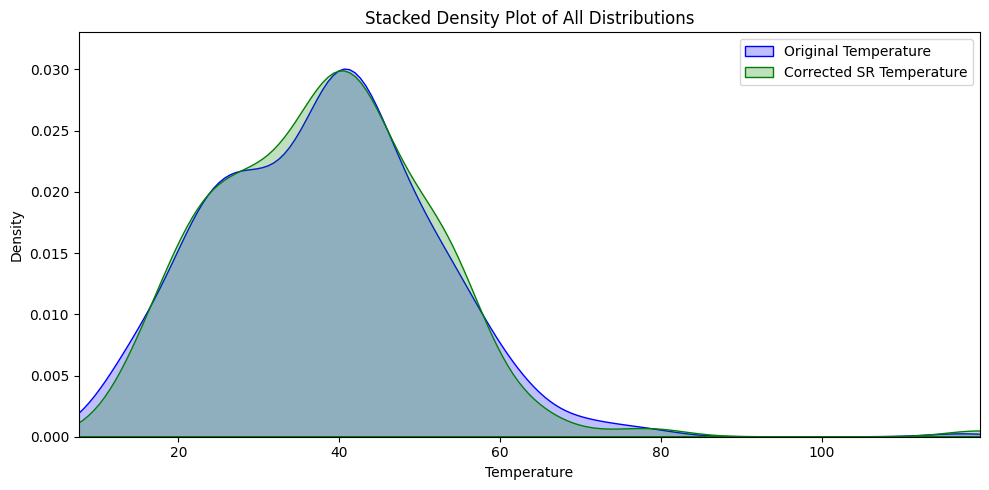

In [10]:
plot_densities([(y, 'Original Temperature', 'blue'), (y_corrected, 'Corrected SR Temperature', 'green')], 'Temperature', stack=True, figsize_per_plot=(10, 5))

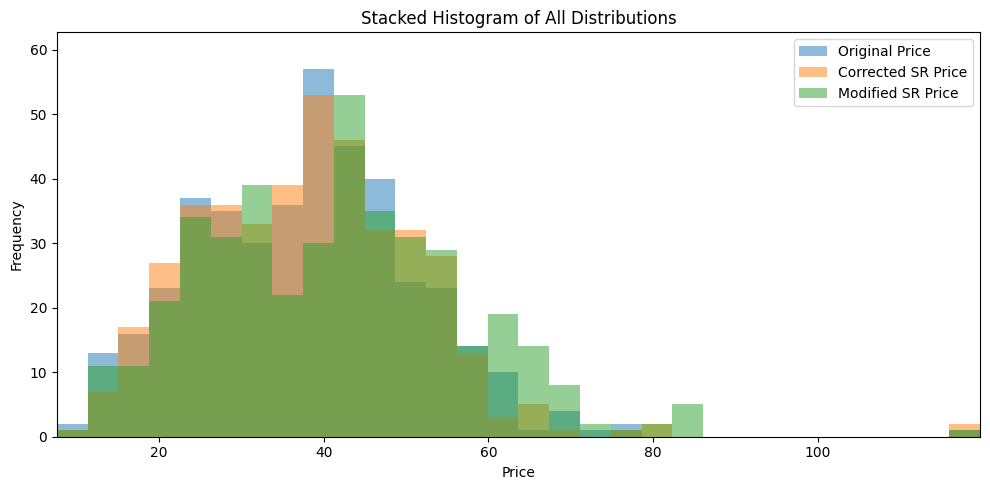

In [11]:
mod_candidate_function = generate_candidate_function("((sqrt(x1 / x0) * 2*x2) - -45.605488) - abs(5.1321917 - abs((log(x0) * 9.815677) + -49.165707))")
mod_y_sr = mod_candidate_function(X)
mod_y_corrected, best_amp, errors, _ = correct_predictions(y, mod_y_sr, method='stratified', amplification_factor=1.0, seed=42, clip_lower=0, clip_upper=None, original_residuals=orig_residuals, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run
plot_histograms([(y, 'Original Price', None), (y_corrected, 'Corrected SR Price', None), (mod_y_corrected, 'Modified SR Price', None)], 'Price', stack=True, figsize_per_plot=(10, 5))